In [ ]:
from tools.tools import set_global_seed
set_global_seed(13)

from data_gen.data_generation_tools import *
from visualization.plots import *

# Short Seasonal Data

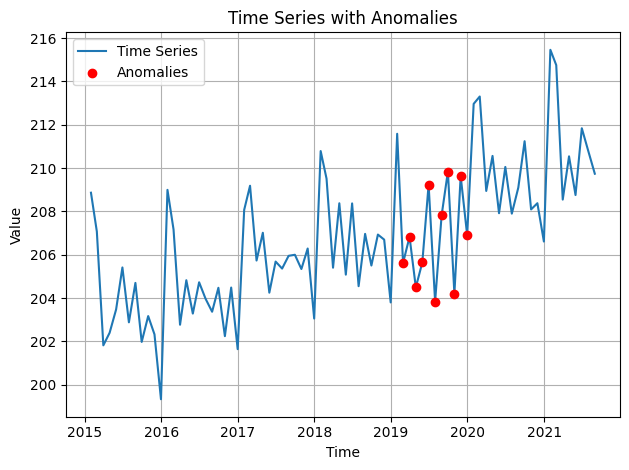

In [ ]:
n = 80

t = np.arange(n)
dates = pd.date_range("2015-01-01", periods=n, freq='ME')

trend = 203 + 0.1 * t  # Linear
seasonality = seasonality_fourier(t, 12)  # Yearly seasonality
arma, _, _ = random_causal_arma(0, 1)  # MA(1)
noise = arma.generate_sample(nsample=n)

ts = trend + seasonality + noise
df = pd.DataFrame({'timestamp': dates, 'value': ts, 'labels': np.zeros(len(ts), dtype=bool)})

inject_noise(df, 49, 60, mean=df['value'].mean(), scale=2.5)
plot_data_with_anom(df)

# df.to_csv("../data/short_seasonal.csv", index=False)